In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

In [56]:

df = pd.read_csv("athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [57]:
print(df['NOC'].nunique())
print(df['NOC'].unique())

230
['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' 'MDA' 'YUG' 'BAH' 'GUA' 'SRB

In [58]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

 e. ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse,

In [59]:
print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].min())
print(df['Age'].max())
print(df['Age'].std())

25.556898357297374
24.0
10.0
97.0
6.393560847035813


In [60]:
df = df.fillna({'Age': 0, 'Height': 0, 'Weight': 0, 'ID': 0})
df = df.astype({'Age': 'uint8', 'Height': 'uint8', 'Weight': 'uint8', 'ID': 'uint32' , 'Year': 'int16'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      271116 non-null  uint32
 1   Name    271116 non-null  object
 2   Sex     271116 non-null  object
 3   Age     271116 non-null  uint8 
 4   Height  271116 non-null  uint8 
 5   Weight  271116 non-null  uint8 
 6   Team    271116 non-null  object
 7   NOC     271116 non-null  object
 8   Games   271116 non-null  object
 9   Year    271116 non-null  int16 
 10  Season  271116 non-null  object
 11  City    271116 non-null  object
 12  Sport   271116 non-null  object
 13  Event   271116 non-null  object
 14  Medal   39783 non-null   object
dtypes: int16(1), object(10), uint32(1), uint8(3)
memory usage: 23.0+ MB


<Axes: xlabel='Sex'>

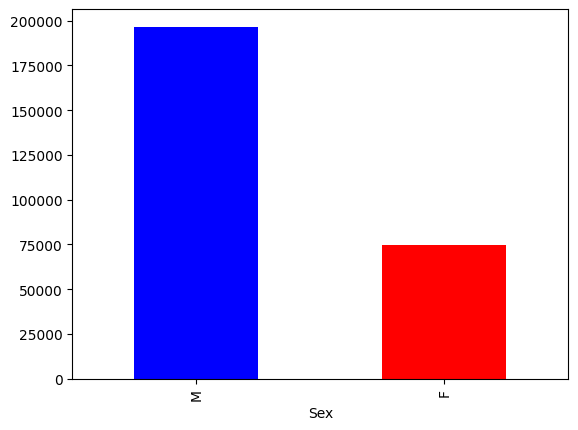

In [61]:
df['Sex'].value_counts().plot(kind='bar', color=['blue', 'red'])

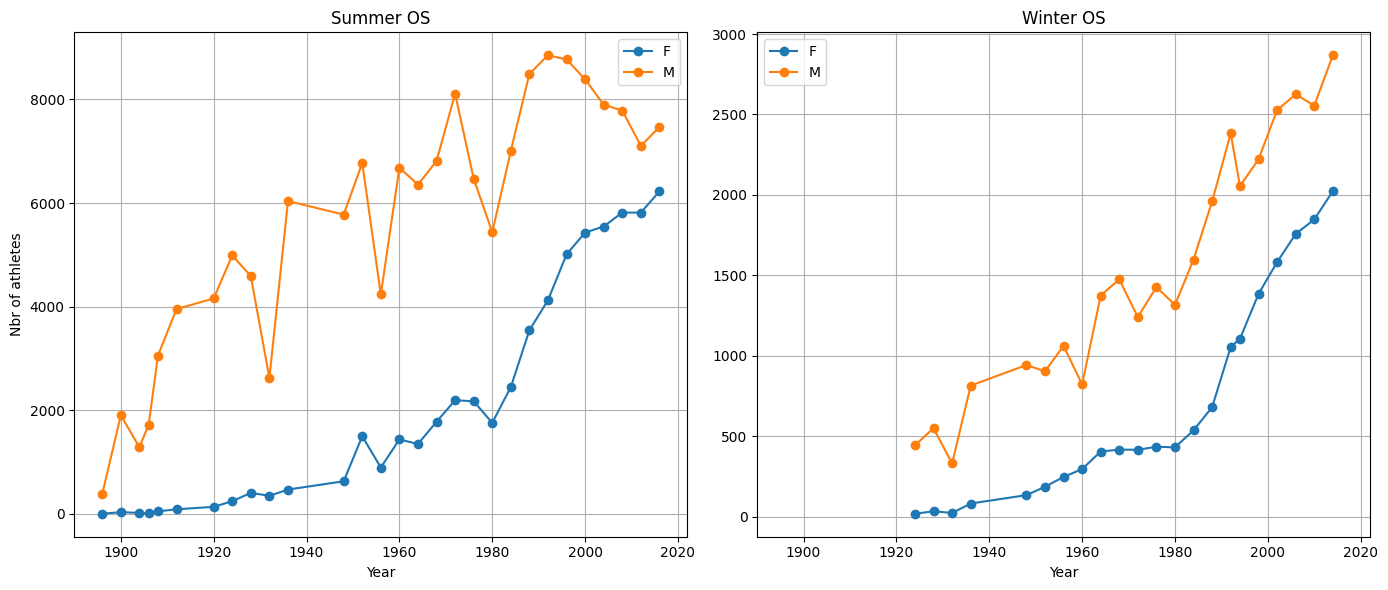

In [62]:

gender_year_season = df.groupby(['Season', 'Year', 'Sex']).size().unstack(fill_value=0)


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

gender_year_season.loc['Summer'].plot(ax=axes[0], marker='o')
axes[0].set_title('Summer OS')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Nbr of athletes')
axes[0].legend()
axes[0].grid(True)

gender_year_season.loc['Winter'].plot(ax=axes[1], marker='o')
axes[1].set_title('Winter OS')
axes[1].set_xlabel('Year')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


<Axes: xlabel='NOC'>

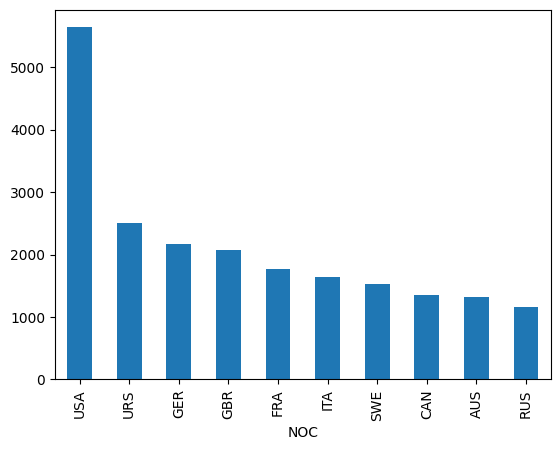

In [63]:
df.groupby('NOC')['Medal'].count().sort_values(ascending=False).iloc[:10].plot.bar()

# ITALIA

In [64]:
italy_df = df[df['NOC'] == 'ITA']
italy_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21,198,90,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
197,91,Emanuele Abate,M,27,190,80,Italy,ITA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 110 metres Hurdles,NaN
198,92,Ignazio Abate,M,21,180,73,Italy,ITA,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,NaN
214,103,Silvano Abba,M,25,0,0,Italy,ITA,1936 Summer,1936,Summer,Berlin,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze
218,106,Agostino Abbagnale,M,22,188,96,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270724,135391,Loredana Zugna,F,32,170,55,Italy,ITA,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Women's Sporting Pistol, 25 metres",NaN
270760,135409,Mauro Carlo Zuliani,M,20,175,62,Italy,ITA,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 400 metres,NaN
270761,135409,Mauro Carlo Zuliani,M,20,175,62,Italy,ITA,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze
270762,135409,Mauro Carlo Zuliani,M,25,175,62,Italy,ITA,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,NaN


In [65]:
df['Name'] = df['Name'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

<Axes: title={'center': 'Italian medals per sport'}, xlabel='Sport'>

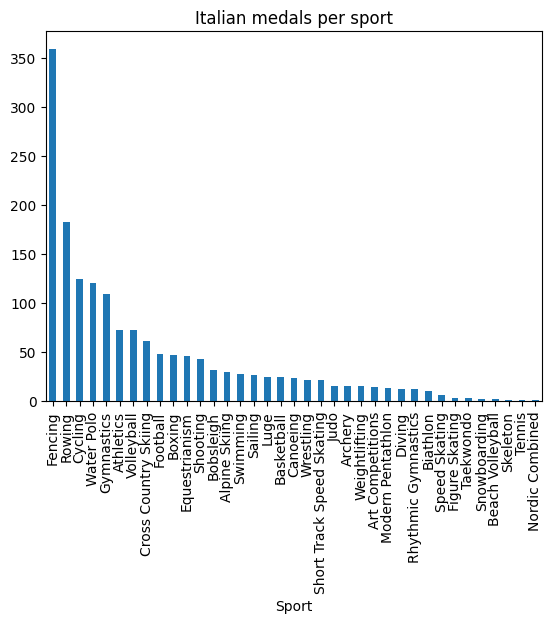

In [66]:
italy_df['Sport'][italy_df['Medal'].notnull()].value_counts().plot.bar(title="Italian medals per sport")

<Axes: title={'center': 'Italian medals per OS'}, xlabel='Games'>

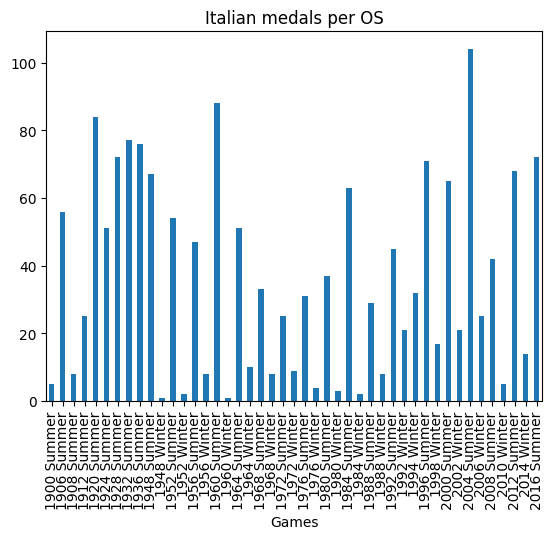

In [67]:
italy_df['Games'][italy_df['Medal'].notnull()].value_counts().sort_index().plot.bar(title="Italian medals per OS")

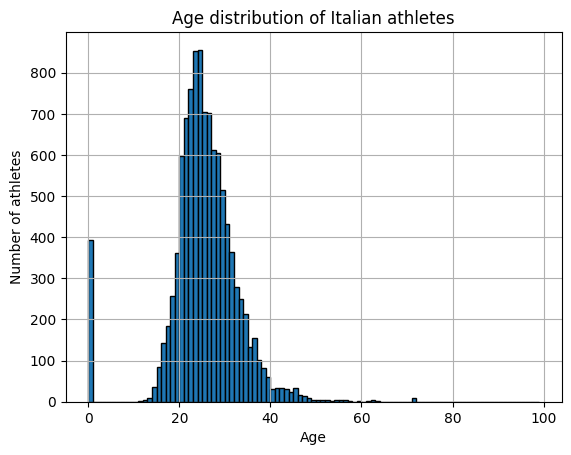

In [68]:
italy_df['Age'].hist(bins=range(0, 100, 1), edgecolor='black')
plt.title("Age distribution of Italian athletes")
plt.xlabel("Age")
plt.ylabel("Number of athletes")
plt.show()

Välja en sport (Equestrianism) och undersök:
- medaljfördelning mellan länder i sporterna
- åldersfördelning i sporterna
- könsfördelning
- italiens medaljer genom åren

visualisera i lämpliga grafer/diagram

<Axes: title={'center': 'Equestrianism medals per country'}, xlabel='NOC'>

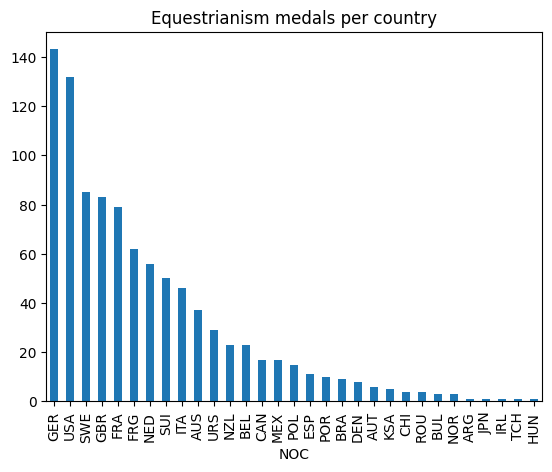

In [179]:
df_equestrianism = df[df['Sport'] == 'Equestrianism']
df_equestrianism['NOC'][df_equestrianism['Medal'].notnull()].value_counts().plot.bar(title="Equestrianism medals per country")


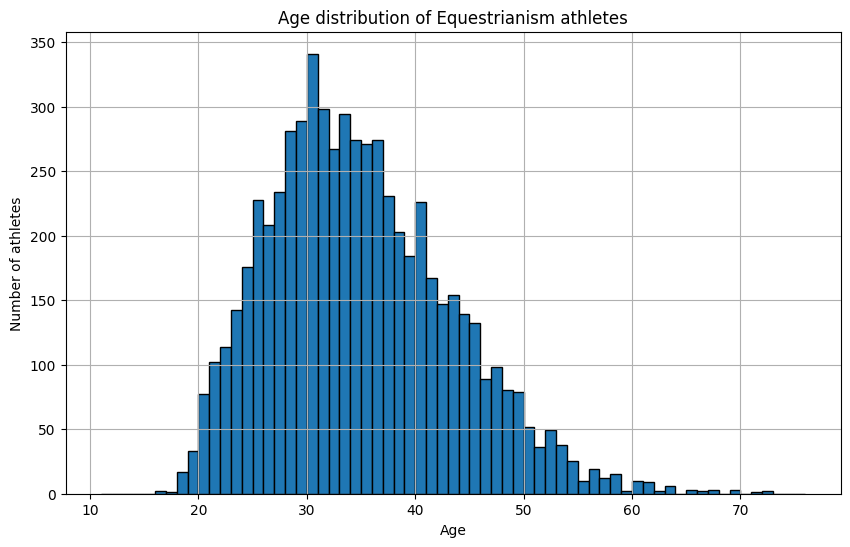

In [194]:
age_min = df_equestrianism['Age'][df_equestrianism['Age'] > 0].min()
age_max = df_equestrianism['Age'].max()

bins=range((age_min - 5), (age_max + 5), 1)
plt.figure(figsize=(10,6))
plt.hist(df_equestrianism['Age'], bins = bins, edgecolor='black') 
plt.title("Age distribution of Equestrianism athletes")
plt.xlabel("Age")
plt.ylabel("Number of athletes")
plt.grid()
plt.show()

<Axes: title={'center': 'Equestrianism athletes by gender'}, xlabel='Sex'>

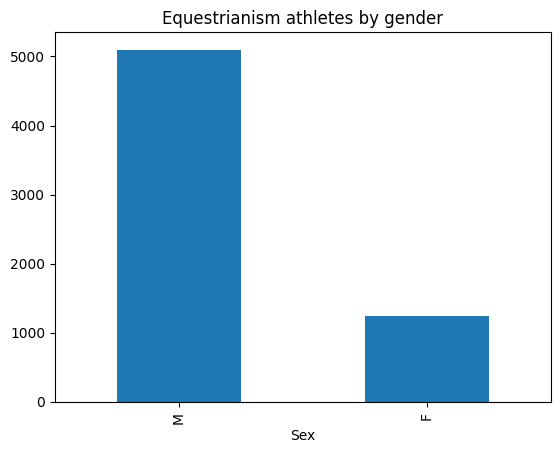

In [196]:
df_equestrianism['Sex'].value_counts().plot.bar(title="Equestrianism athletes by gender")

<Axes: title={'center': 'Italian Equestrianism medals per year'}, xlabel='Year', ylabel='Number of medals'>

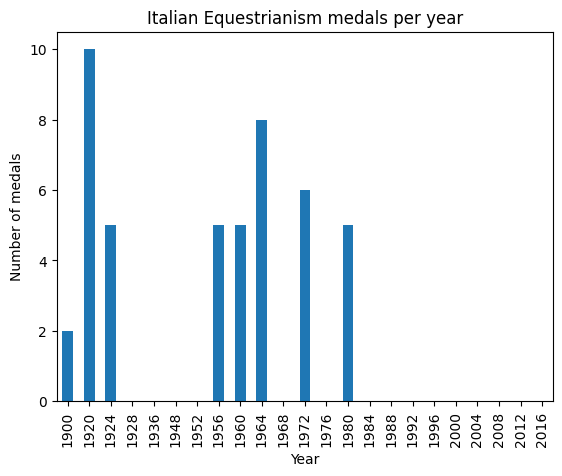

In [203]:
df_equestrianism_italy = df_equestrianism[df_equestrianism['NOC'] == 'ITA']
all_years = df_equestrianism_italy['Year'].unique()
medals_per_year = (df_equestrianism_italy[df_equestrianism_italy['Medal'].notnull()].groupby('Year').size())
medals_per_year = medals_per_year.reindex(all_years, fill_value=0).sort_index()

medals_per_year.plot.bar(
    title = "Italian Equestrianism medals per year",
    xlabel = "Year",
    ylabel = "Number of medals"
    ) 